In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = os.path.join(os.getcwd(), 'data')
data_path

'/nfs/science/shared/ipythonNotebooks/leom/Kaggle/BB/data'

In [4]:
df_kpis = pd.read_excel(os.path.join(data_path, 'analisi.xlsx'), sheetname='KPIs')
df_spending = pd.read_excel(os.path.join(data_path, 'analisi.xlsx'), sheetname='Spending')

In [5]:
df_kpis.sort_values(by='Date', inplace=True)
# df_kpis.head(20)

In [6]:
df_kpis.shape

(932, 12)

In [7]:
df_kpis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 931
Data columns (total 12 columns):
Date    932 non-null datetime64[ns]
K1      932 non-null int64
K2      932 non-null int64
K3      932 non-null int64
K4      932 non-null int64
K5      932 non-null int64
K6      932 non-null int64
K7      932 non-null int64
K8      932 non-null int64
K9      932 non-null float64
K10     932 non-null float64
K11     932 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 94.7 KB


In [8]:
df_kpis.describe()

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,11.957082,121.608369,1224.939914,1008.123391,2394.230687,2235.681330,401.503219,7398.043991,5.462774,0.374937,0.284551
std,92.494702,378.316995,516.493054,2823.077832,715.492618,1735.547803,382.924656,3998.842786,0.919098,0.115165,0.096236
min,0.000000,0.000000,155.000000,0.000000,194.000000,109.000000,83.000000,923.000000,3.030303,0.083159,0.035433
25%,0.000000,13.000000,826.750000,3.000000,1856.000000,1009.750000,235.000000,4504.000000,4.914800,0.291034,0.216624
50%,0.000000,27.000000,1234.000000,20.000000,2316.000000,1546.500000,330.000000,6224.000000,5.262321,0.404677,0.267932
75%,2.000000,56.000000,1482.500000,159.000000,2798.750000,3089.000000,448.000000,9447.500000,5.693961,0.454279,0.346154
max,2117.000000,4716.000000,3425.000000,20157.000000,5159.000000,8214.000000,6853.000000,25456.000000,9.331267,0.670593,0.678571


In [9]:
df_spending.sort_values(by='Date', inplace=True)
# df_spending.head()

In [10]:
df_spending.shape

(48, 4)

In [11]:
df_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 20
Data columns (total 4 columns):
Date    48 non-null datetime64[ns]
E1      48 non-null int64
E2      48 non-null int64
E3      48 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.9 KB


In [12]:
df_spending.describe()

,E1,E2,E3
count,48.000000,48.000000,48.000000
mean,46641.375000,156225.062500,202866.437500
std,35972.240014,141070.034149,155455.458537
min,275.000000,0.000000,8490.000000
25%,16821.750000,20376.750000,63422.500000
50%,36485.500000,137202.500000,195134.000000
75%,69458.500000,264528.000000,315655.750000
max,169345.000000,683948.000000,711357.000000


In [13]:
df_kpis['month'] = df_kpis['Date'].dt.month
df_kpis['year'] = df_kpis['Date'].dt.year
df_kpis['weekday'] = df_kpis['Date'].dt.weekday
df_kpis['days_in_month'] = df_kpis['Date'].dt.daysinmonth

df_kpis_date = df_kpis['Date']

df_spending['month'] = df_spending['Date'].dt.month
df_spending['year'] = df_spending['Date'].dt.year
df_spending['days_in_month'] = df_spending['Date'].dt.daysinmonth
df_spending.index = df_spending['Date']
df_spending.drop('Date', axis=1, inplace=True)

df_spending['avgE1'] = df_spending['E1']/df_spending['days_in_month']
df_spending['avgE2'] = df_spending['E2']/df_spending['days_in_month']

df_kpis = df_kpis.merge(df_spending[['year', 'month', 'avgE1', 'avgE2']], on=['year', 'month'],
                        how='inner')
df_kpis.index = df_kpis_date

df_kpis.drop(['year', 'days_in_month'], axis=1, inplace=True)

In [14]:
df_kpis.head()

,Date,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,month,weekday,avgE1,avgE2
Date,,,,,,,,,,,,,,,,
2015-03-16,2015-03-16,0,0,155,0,194,379,195,923,3.030303,0.210184,0.333333,3,0,530.129032,4403.387097
2015-03-17,2015-03-17,1,8,1074,34,1320,658,468,3563,4.532667,0.370474,0.301205,3,1,530.129032,4403.387097
2015-03-18,2015-03-18,0,10,1129,46,1349,652,493,3679,4.902364,0.366676,0.288462,3,2,530.129032,4403.387097
2015-03-19,2015-03-19,0,7,1107,33,1251,597,522,3517,4.775744,0.355701,0.385714,3,3,530.129032,4403.387097
2015-03-20,2015-03-20,0,13,1116,143,1484,606,453,3815,4.228381,0.388991,0.678571,3,4,530.129032,4403.387097


### K11 time series
Check for trend and/or seasonality

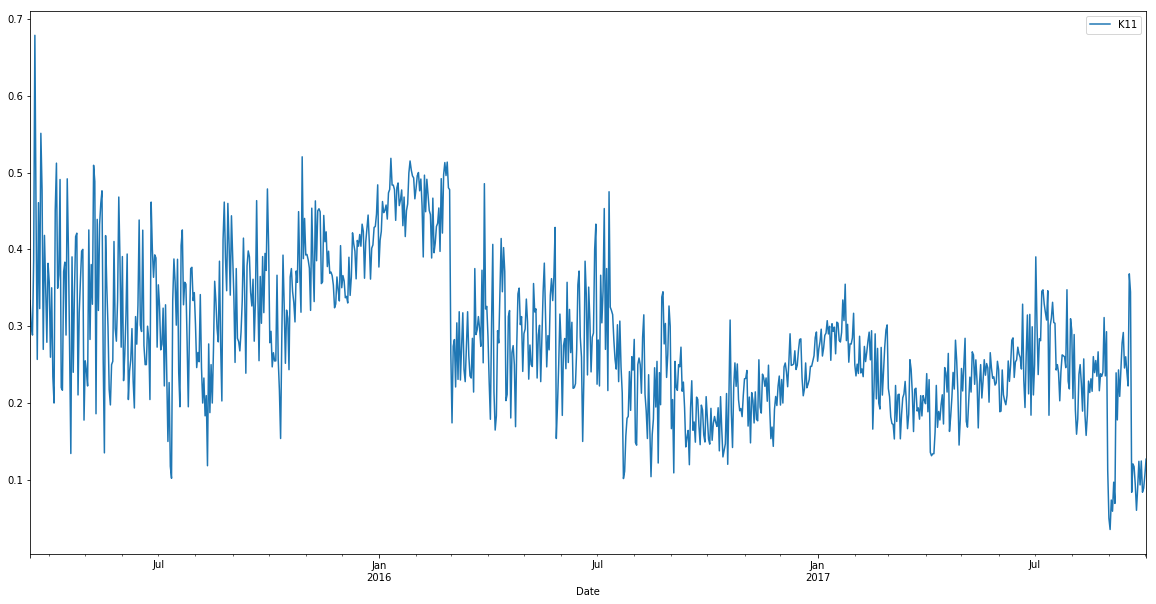

In [15]:
kvar = 'K11'
df_kpis.plot(x='Date', y=kvar, figsize=(20, 10))

From the chart it's difficult to distinguish a clear trend. There is huge drop in Mar 2016.

Let's make a stationary test

In [16]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_kpis[kvar].values)

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


(-1.6802241130158082,
 0.4413293274507788,
 21,
 910,
 {'1%': -3.4375564198635562,
  '10%': -2.5684639415529524,
  '5%': -2.8647213198889023},
 -2599.2934167670692)

The series is not stationary (p-value: 0.441).
Let's decompose the series:

In [17]:
df = df_kpis[['Date','K11']]
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


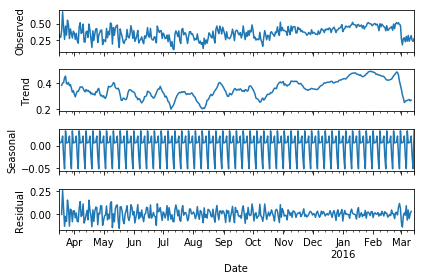

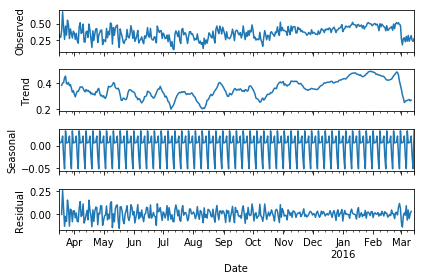

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df[df.index < '2016-03-15'])
decomp.plot()

In [19]:
from statsmodels.graphics.tsaplots import acf, plot_acf
from statsmodels.graphics.tsaplots import pacf, plot_pacf

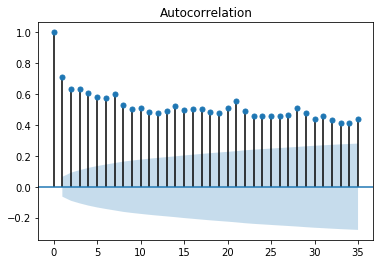

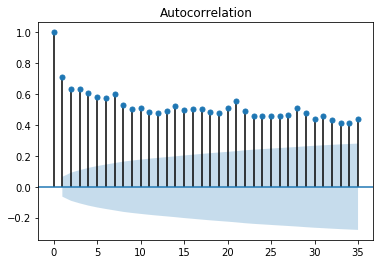

In [20]:
plot_acf(df_kpis[kvar].values, lags=35)

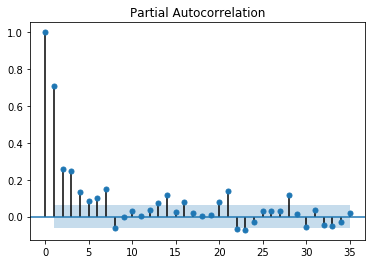

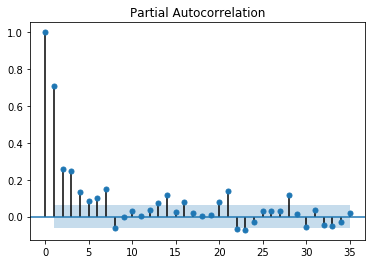

In [21]:
plot_pacf(df_kpis[kvar].values, lags=35)

There is a clear seasonality and looks like it's an autoregressive process. 
It's worth to try differentiate the data at weekly level.

In [22]:
df_diff = df[kvar] - df[kvar].shift(7)
df_diff = df_diff[df_diff.notnull()]

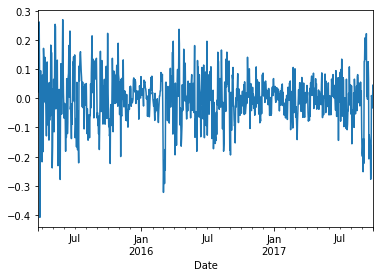

In [24]:
df_diff.plot()

In [25]:
adfuller(df_diff)

(-9.9025128747159599,
 3.3288699746463317e-17,
 20,
 904,
 {'1%': -3.4376043869287467,
  '10%': -2.5684752071912444,
  '5%': -2.8647424697167403},
 -2516.9935776068651)

Now the series is definitely stationary

[]

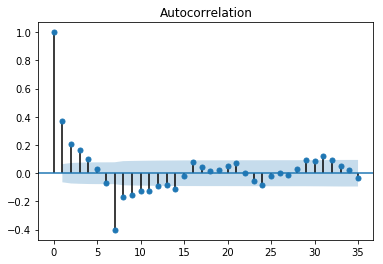

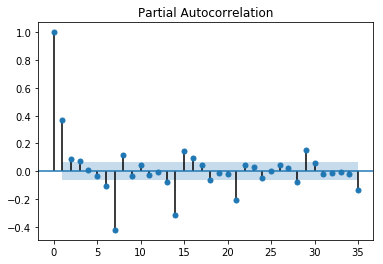

In [27]:
plot_acf(df_diff, lags=35)
plot_pacf(df_diff, lags=35)
plt.plot()

In [49]:
# acf(df_diff)

In [50]:
# for i in range(2,5): print(acf(df_diff)[1]**i)

In [51]:
# from statsmodels.stats.diagnostic import acorr_ljungbox
# ljungbox_test = acorr_ljungbox(residuals, lags=35)

Let's try a SARIMA as well, there seems to be a progressive degradation in the acf plot on the season pattern (weekly)

In [28]:
from statsmodels.tsa.statespace import sarimax
df_diff_sarma11 = sarimax.SARIMAX(df_diff, order=(1,0,0), seasonal_order=(0,0,1,7))

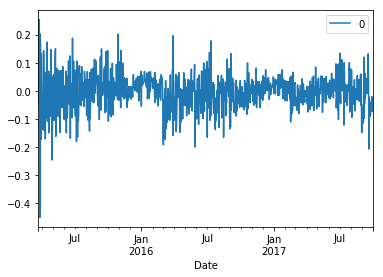

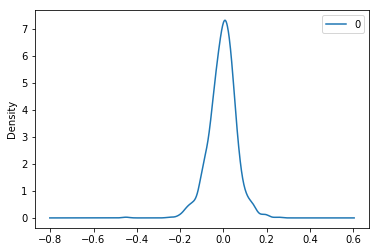

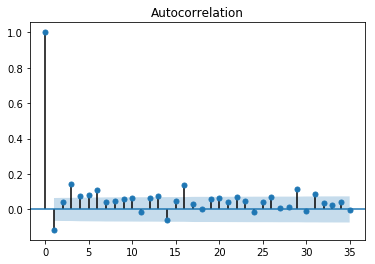

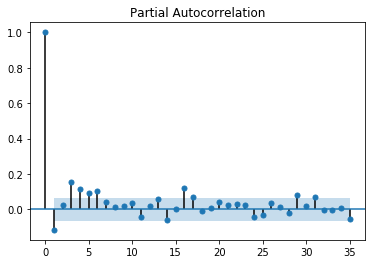

In [30]:
sarma11_fit = df_diff_sarma11.fit()
sarma11_fit.params

# plot residual errors
residualss = pd.DataFrame(sarma11_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()

In [31]:
sarma11_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                               K11   No. Observations:                  925
Model:             SARIMAX(1, 0, 0)x(0, 0, 1, 7)   Log Likelihood                1261.204
Date:                           Tue, 05 Dec 2017   AIC                          -2516.408
Time:                                   09:15:57   BIC                          -2501.919
Sample:                               03-23-2015   HQIC                         -2510.880
                                    - 10-02-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5287      0.024     22.142      0.000       0.482       0.575
ma.S.L7       -0.8429      0.019    -43.387      0.000      -0.881      -0.805
sigma2         0.0038      0.000     27.951      0.000       0.004       0.004
===================================================================================
Ljung-Box (Q):                      157.43   Jarque-Bera (JB):               128.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## With exonegous variables

Let's calculate the correlation between the different metrics

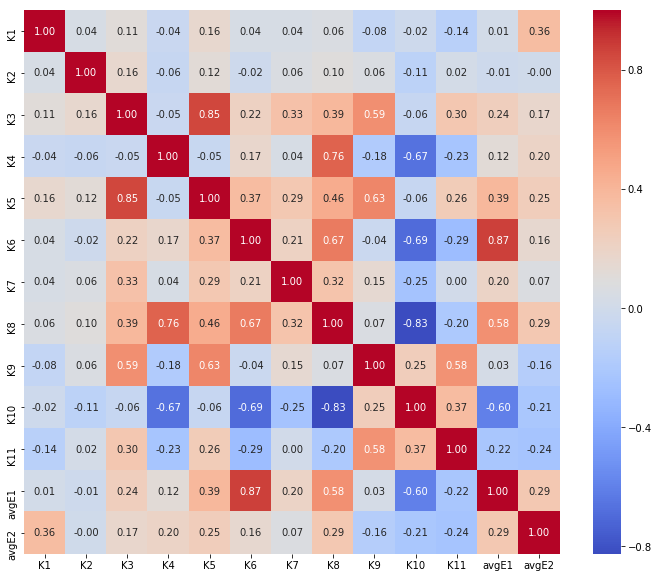

In [32]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10))
g = sns.heatmap(df_kpis.drop(['Date', 'month', 'weekday'], axis=1).corr(), annot=True,
                fmt=".2f", cmap='coolwarm', ax=ax)

K9 (and K10?) are correlated with K11

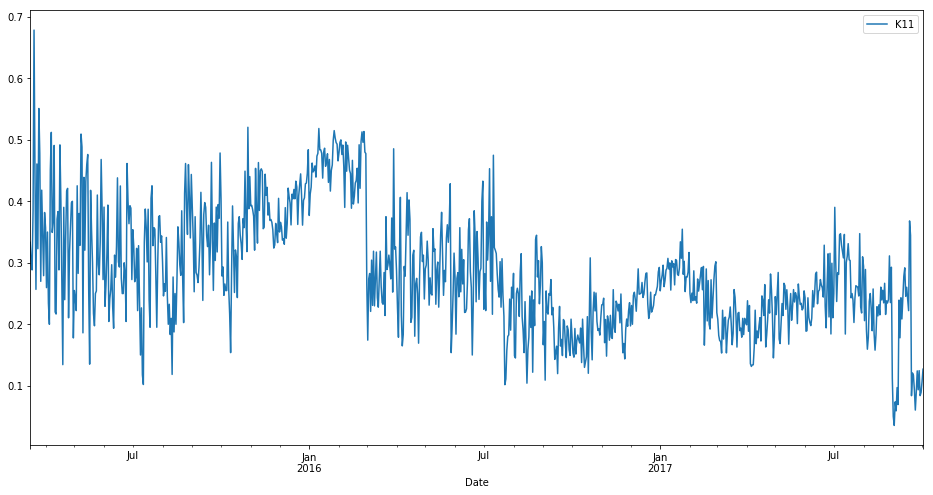

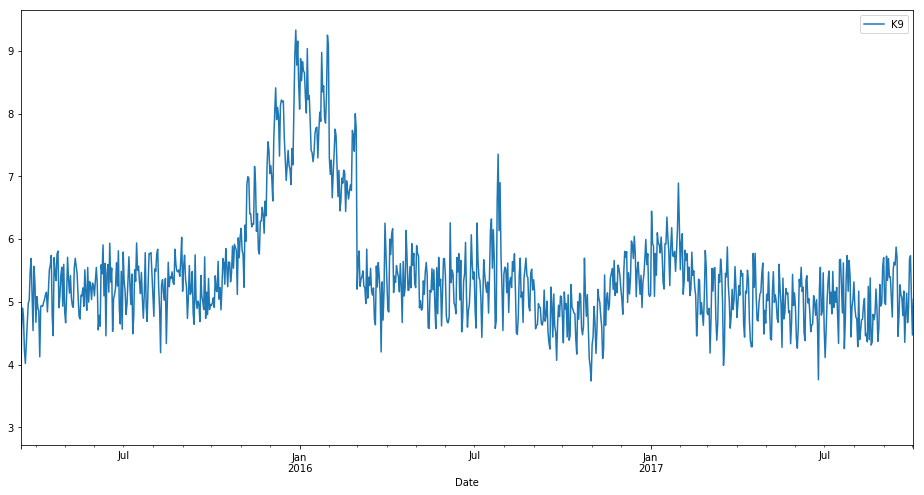

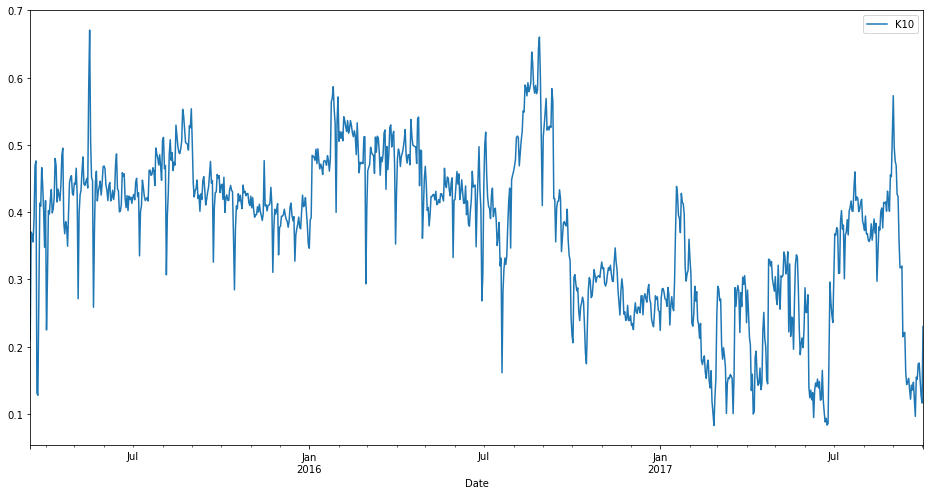

In [62]:
df_kpis.plot(x='Date', y='K11', figsize=(16, 8))
df_kpis.plot(x='Date', y='K9', figsize=(16, 8))
df_kpis.plot(x='Date', y='K10', figsize=(16, 8))

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


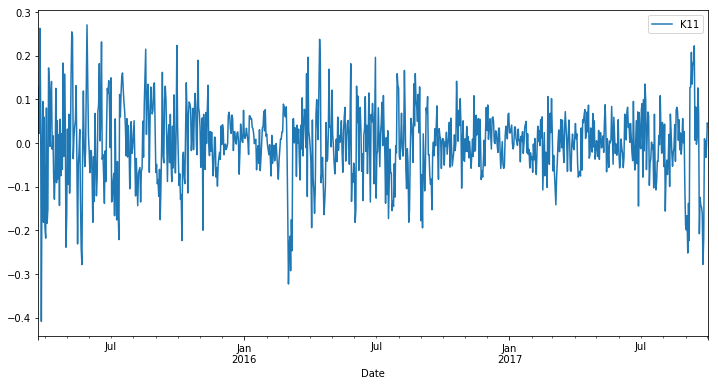

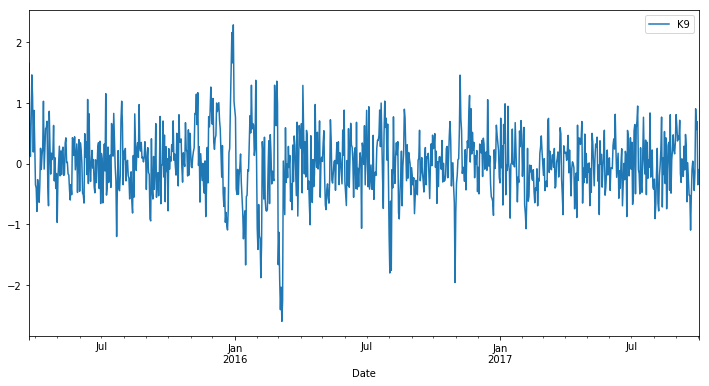

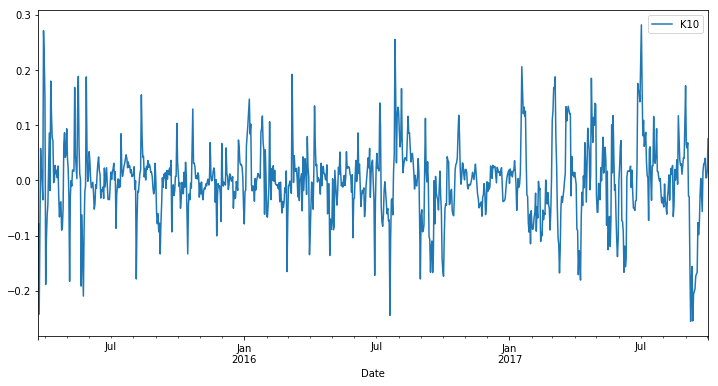

In [34]:
# weekly differentiation
df = df_kpis[['Date','K11', 'K9', 'K10']]
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

def diff1(df, var, lag):
    df_diff = df[var] - df[var].shift(lag)
    return df_diff[df_diff.notnull()]

df_diffK11 = diff1(df, 'K11', 7)
df_diffK9 = diff1(df, 'K9', 7)
df_diffK10 = diff1(df, 'K10', 7)

df_diff_var = pd.concat([df_diffK11, df_diffK9, df_diffK10], axis=1)

df_diff_var.plot(df_diff_var.index, 'K11', figsize=(12,6))
df_diff_var.plot(df_diff_var.index, 'K9', figsize=(12,6))
df_diff_var.plot(df_diff_var.index, 'K10', figsize=(12,6))

In [35]:
df_diff_var.corr()

,K11,K9,K10
K11,1.000000,0.168564,0.021915
K9,0.168564,1.000000,0.022876
K10,0.021915,0.022876,1.000000


In [36]:
train = df_diff_var[df_diff_var.index < '2017-09-01']
test = df_diff_var[df_diff_var.index >= '2017-09-01']

0.0443145463415


[]

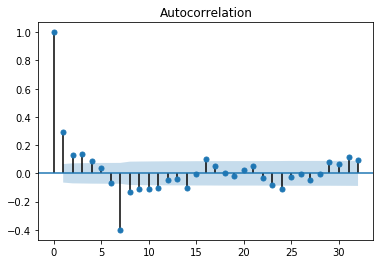

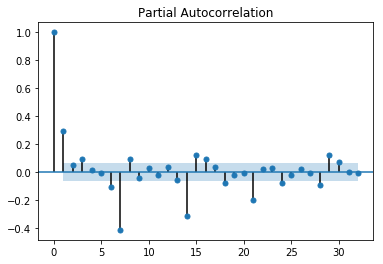

In [37]:
# removing K10 from the analysis (and also K9 seems useless...)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

stdscaler = StandardScaler()
stdscaler.fit(train)

new_train = pd.DataFrame(stdscaler.transform(train), columns=train.columns, index=train.index)
new_test = pd.DataFrame(stdscaler.transform(test), columns=test.columns, index=test.index)

X_train = new_train.drop('K11', axis=1)
y_train = new_train['K11']

X_test = new_test.drop('K11', axis=1)
y_test = new_test['K11']

dfdv_std = stdscaler.fit_transform(df_diff_var)
dfdv_std = pd.DataFrame(dfdv_std, columns=df_diff_var.columns, index=df_diff_var.index)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_train, y_train))

y_pred = lm.predict(X_train)
residuals = y_train - y_pred

plot_acf(residuals, lags=32)
plot_pacf(residuals, lags=32)
plt.plot()

Model is useless

In [38]:
# let's try all first differences
new_cols = []
new_df = pd.DataFrame()
for col in df_kpis.columns:
    # print(col)
    try:
        temp_col = diff1(df_kpis, col, 7)
        new_cols.append(col)
    except Exception:
        continue
    new_df = pd.concat([new_df, temp_col],axis=1)

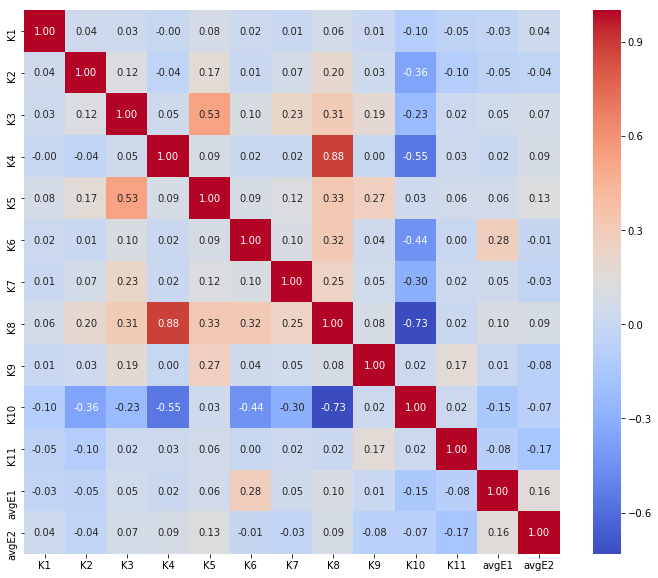

In [39]:
fig, ax = plt.subplots(figsize=(12,10))
g = sns.heatmap(new_df.drop(['Date', 'month', 'weekday'], axis=1).corr(), annot=True,
                fmt=".2f", cmap='coolwarm', ax=ax)

K9         0.225570
K10        0.033576
ar.L1      0.421898
ma.S.L7   -0.880906
sigma2     0.542965
dtype: float64


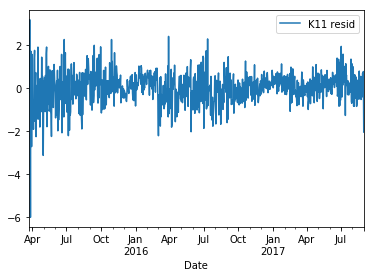

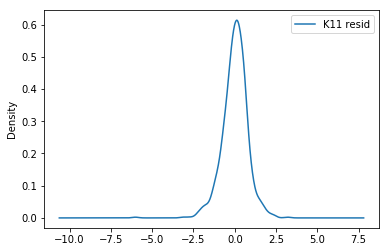

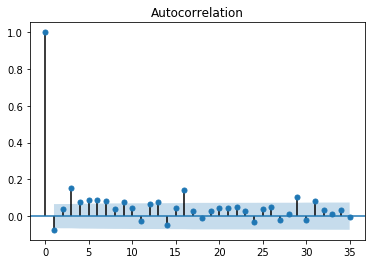

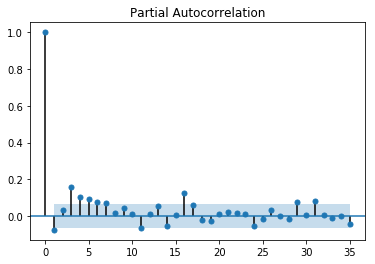

In [47]:
from statsmodels.tsa.statespace import sarimax
df_diff_var_sarma11 = sarimax.SARIMAX(y_train, order=(1,0,0), seasonal_order=(0,0,1,7), exog=X_train)

sarmavar11_fit = df_diff_var_sarma11.fit()
print(sarmavar11_fit.params)

# plot residual errors
residualss = pd.DataFrame(sarmavar11_fit.resid, columns=['K11 resid'])
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()

In [41]:
sarmavar11_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                               K11   No. Observations:                  893
Model:             SARIMAX(1, 0, 0)x(0, 0, 1, 7)   Log Likelihood                -999.771
Date:                           Tue, 05 Dec 2017   AIC                           2009.542
Time:                                   09:26:32   BIC                           2033.514
Sample:                               03-23-2015   HQIC                          2018.703
                                    - 08-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
K9             0.2256      0.027      8.244      0.000       0.172       0.279
K10            0.0336      0.030      1.103      0.270      -0.026       0.093
ar.L1          0.4219      0.027     15.548      0.000       0.369       0.475
ma.S.L7       -0.8809      0.018    -49.642      0.000      -0.916      -0.846
sigma2         0.5430      0.019     28.169      0.000       0.505       0.581
===================================================================================
Ljung-Box (Q):                      135.99   Jarque-Bera (JB):               236.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
f11 = sarmavar11_fit.forecast(X_test.shape[0], exog=X_test)

In [44]:
forecasts = pd.DataFrame(y_test)
forecasts['K11'] = f11

In [45]:
pred_test = pd.concat([forecasts, X_test], axis=1)
pred_test = pd.DataFrame(stdscaler.inverse_transform(pred_test), columns=test.columns, index=test.index)
pred_test.head()

,K11,K9,K10
Date,,,
2017-09-01,-0.038174,0.806302,0.177119
2017-09-02,-0.019307,0.623952,0.065799
2017-09-03,-0.003553,0.373736,0.058928
2017-09-04,-0.042456,0.452137,0.068934
2017-09-05,0.016088,0.407860,-0.032119


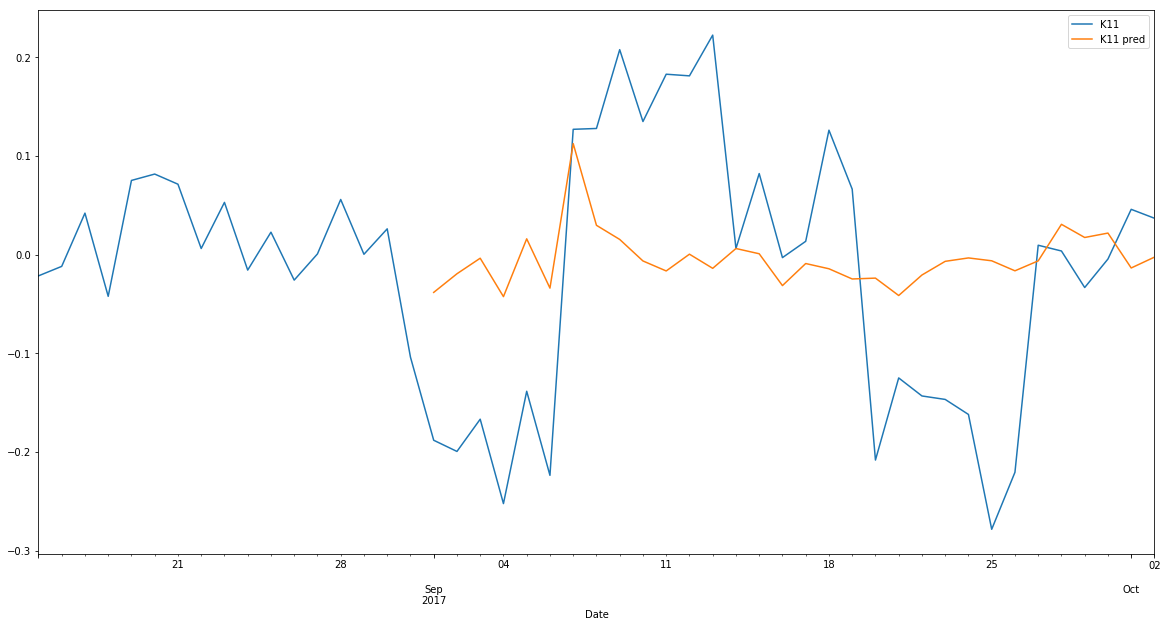

In [46]:
y_pre = pd.DataFrame(train.loc[train.index >= '2017-08-15', 'K11'])
y_pre['K11 pred'] = np.NaN

y_values = pd.concat([test['K11'], pred_test['K11']], axis=1)
y_values.columns = ['K11', 'K11 pred']

y_toplot = pd.concat([y_pre, y_values], axis=0)
y_toplot.plot(figsize=(20,10))

### Togliendo K10...

K9         0.227292
ar.L1      0.428082
ma.S.L7   -0.884058
sigma2     0.543577
dtype: float64


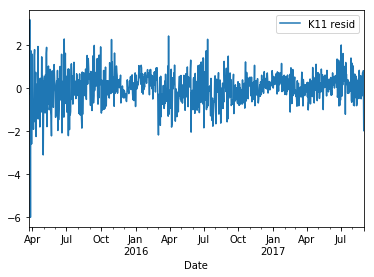

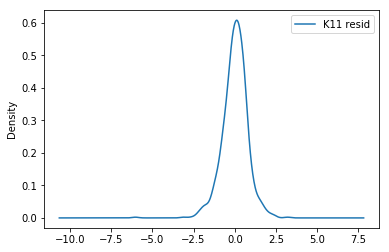

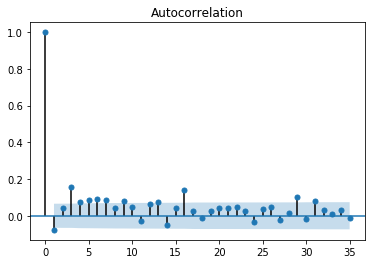

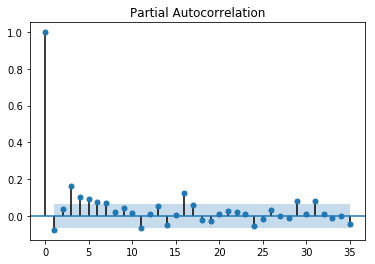

In [49]:
from statsmodels.tsa.statespace import sarimax
df_diff_var_sarma12 = sarimax.SARIMAX(y_train, order=(1,0,0), seasonal_order=(0,0,1,7), exog=X_train.drop('K10', axis=1))

sarmavar12_fit = df_diff_var_sarma12.fit()
print(sarmavar12_fit.params)

# plot residual errors
residualss = pd.DataFrame(sarmavar11_fit.resid, columns=['K11 resid'])
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()

In [57]:
from scipy.stats import shapiro
shapiro(residualss)

(0.959708034992218, 5.7915674480605445e-15)

In [50]:
sarmavar12_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                               K11   No. Observations:                  893
Model:             SARIMAX(1, 0, 0)x(0, 0, 1, 7)   Log Likelihood               -1000.363
Date:                           Tue, 05 Dec 2017   AIC                           2008.726
Time:                                   09:56:10   BIC                           2027.905
Sample:                               03-23-2015   HQIC                          2016.055
                                    - 08-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
K9             0.2273      0.027      8.271      0.000       0.173       0.281
ar.L1          0.4281      0.027     15.813      0.000       0.375       0.481
ma.S.L7       -0.8841      0.018    -50.209      0.000      -0.919      -0.850
sigma2         0.5436      0.019     28.052      0.000       0.506       0.582
===================================================================================
Ljung-Box (Q):                      135.09   Jarque-Bera (JB):               224.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
f12 = sarmavar12_fit.forecast(X_test.shape[0], exog=X_test.drop('K10', axis=1))

In [54]:
forecasts2 = pd.DataFrame(y_test)
forecasts2['K11'] = f12

In [55]:
pred_test2 = pd.concat([forecasts2, X_test], axis=1)
pred_test2 = pd.DataFrame(stdscaler.inverse_transform(pred_test2), columns=test.columns, index=test.index)
pred_test2.head()

,K11,K9,K10
Date,,,
2017-09-01,-0.046811,0.806302,0.177119
2017-09-02,-0.025928,0.623952,0.065799
2017-09-03,-0.009466,0.373736,0.058928
2017-09-04,-0.048792,0.452137,0.068934
2017-09-05,0.011988,0.407860,-0.032119


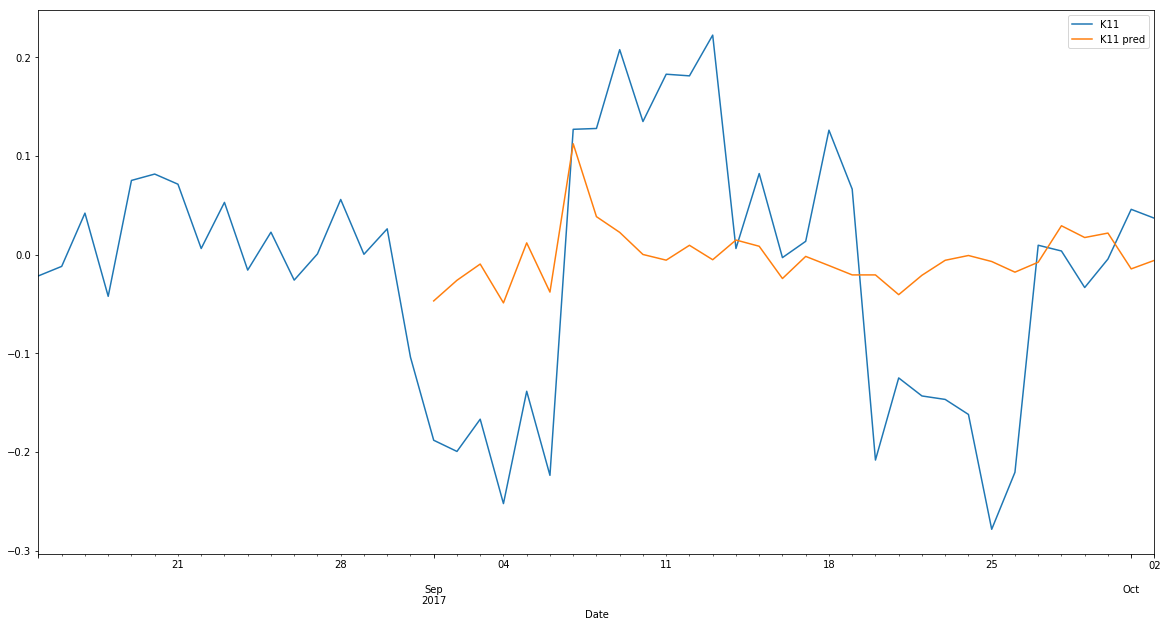

In [56]:
y_pre2 = pd.DataFrame(train.loc[train.index >= '2017-08-15', 'K11'])
y_pre2['K11 pred'] = np.NaN

y_values2 = pd.concat([test['K11'], pred_test2['K11']], axis=1)
y_values2.columns = ['K11', 'K11 pred']

y_toplot2 = pd.concat([y_pre2, y_values2], axis=0)
y_toplot2.plot(figsize=(20,10))

In [58]:
y_values['perc_error'] = abs(y_values['K11'] - y_values['K11 pred'])/abs(y_values['K11'])
y_values['perc_error'].mean()

1.6001771431796921

In [59]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 200 * np.mean(diff)

smape(y_values['K11'], y_values['K11 pred'])

167.23691744619867